<a href="https://colab.research.google.com/github/riinakik/digital-humanities-technologies/blob/main/penguins_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Penguins Dataset Analysis**

This analysis explores the Penguins dataset, which contains morphological measurements for three penguin species—Adelie, Chinstrap, and Gentoo—collected from three islands in Antarctica. The goal of this report is to examine differences between species, compare male and female characteristics, and investigate relationships between key biological features such as body mass, flipper length, and culmen dimensions. The analysis uses visualisations and summary statistics to highlight patterns in the dataset and provide insights into penguin morphology and biological variation.

In [4]:
import pandas as pd
df = pd.read_csv("penguins.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


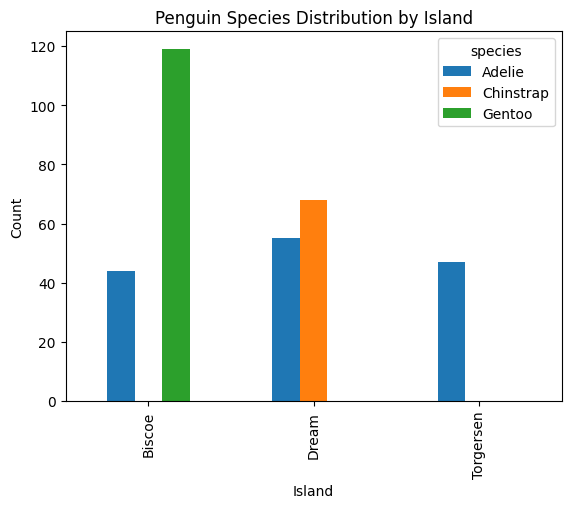

In [6]:
import matplotlib.pyplot as plt

df.groupby(["island", "species"]).size().unstack().plot(kind="bar")

plt.title("Penguin Species Distribution by Island")
plt.xlabel("Island")
plt.ylabel("Count")
plt.show()


**Description:**
This chart shows how penguin species are distributed across the three islands.
Adelie penguins occur on all islands, Chinstrap penguins appear only on Dream Island, and Gentoo penguins are found exclusively on Biscoe Island.
This indicates a clear geographic separation between species.

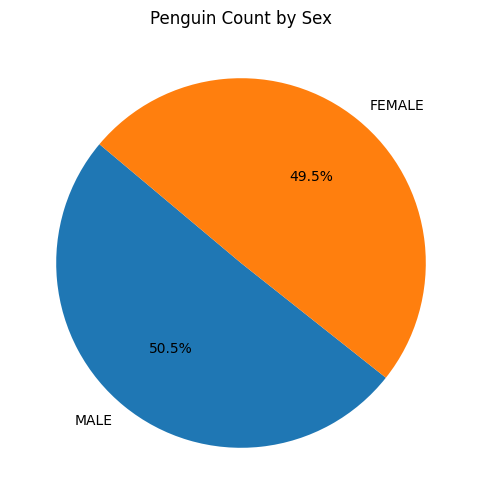

In [7]:
sex_count = df["sex"].value_counts()

plt.figure(figsize=(6,6))

plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Penguin Count by Sex")

plt.show()

**Description:**
The pie chart shows that the dataset contains a nearly balanced number of male and female penguins.
There is no strong sex bias in the observations, suggesting that the data sample is fairly representative.

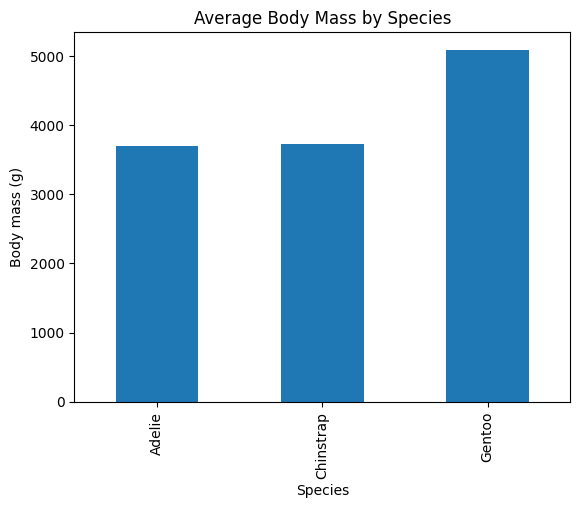

In [8]:
penguin_size =df.groupby("species")["body_mass_g"].mean()
penguin_size.plot(kind="bar")

plt.title("Average Body Mass by Species")
plt.xlabel("Species")
plt.ylabel("Body mass (g)")

plt.show()

**Description:**
The pie chart shows that the dataset contains a nearly balanced number of male and female penguins.
There is no strong sex bias in the observations, suggesting that the data sample is fairly representative.

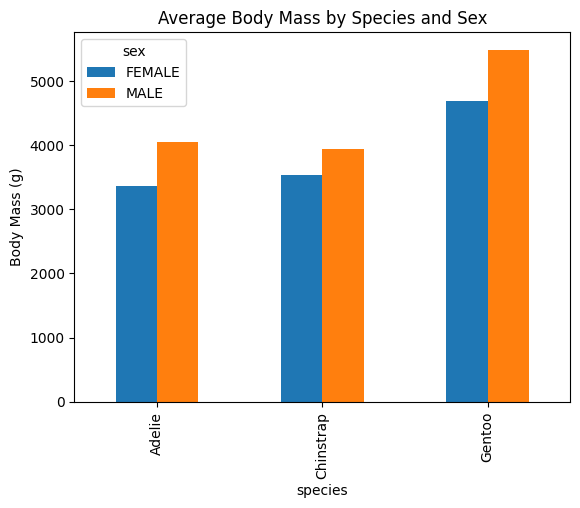

In [9]:
df.groupby(["species", "sex"])["body_mass_g"].mean().unstack().plot(kind="bar")
plt.title("Average Body Mass by Species and Sex")
plt.ylabel("Body Mass (g)")
plt.show()

**Description:**
Across all species, males tend to be heavier than females, demonstrating typical sexual size dimorphism in penguins.
Gentoo males are particularly heavy compared to the other groups.

<Figure size 800x500 with 0 Axes>

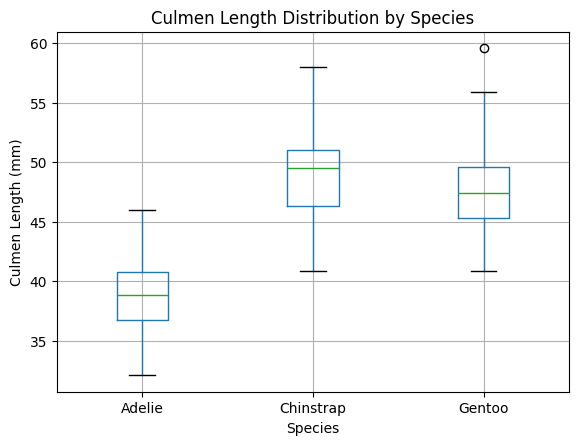

In [10]:
plt.figure(figsize=(8,5))
df.boxplot(column="culmen_length_mm", by="species")
plt.title("Culmen Length Distribution by Species")
plt.suptitle("")
plt.xlabel("Species")
plt.ylabel("Culmen Length (mm)")
plt.show()

**Description:**
This boxplot compares the culmen (bill) length across the three penguin species.
Gentoo and Chinstrap penguins tend to have longer culmens, while Adelie penguins have the shortest bills on average.
The distributions show clear separation between species, suggesting culmen length is a strong distinguishing morphological feature.

<Figure size 800x500 with 0 Axes>

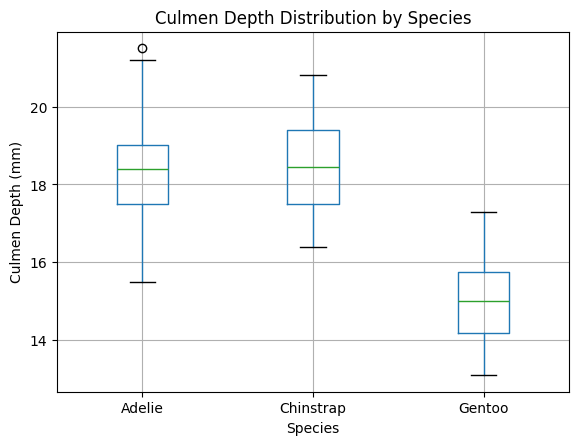

In [20]:
plt.figure(figsize=(8,5))
df.boxplot(column="culmen_depth_mm", by="species")
plt.title("Culmen Depth Distribution by Species")
plt.suptitle("")
plt.xlabel("Species")
plt.ylabel("Culmen Depth (mm)")
plt.show()


**Description:**
This boxplot shows differences in culmen (bill) depth across species.
Adelie penguins have the deepest, thickest bills, whereas Gentoo penguins have the shallowest culmens.
Chinstraps fall between the two.
Together with culmen length, this measurement strongly separates the species based on beak shape.

<Figure size 800x500 with 0 Axes>

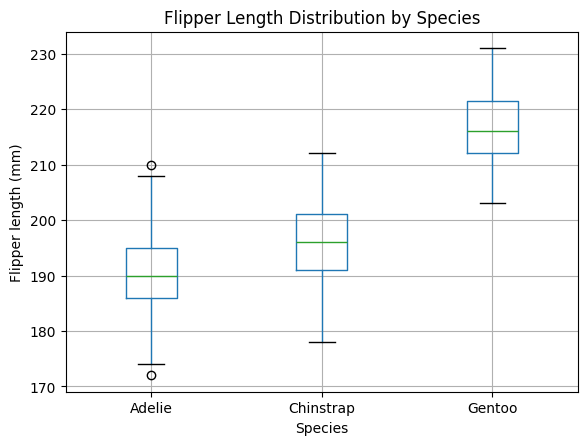

In [11]:
plt.figure(figsize=(8,5))
df.boxplot(column="flipper_length_mm", by="species")
plt.title("Flipper Length Distribution by Species")
plt.suptitle("")
plt.xlabel("Species")
plt.ylabel("Flipper length (mm)")
plt.show()

**Description:**
This graph displays how flipper length varies between species.
Gentoo penguins have the longest flippers by a wide margin, reflecting their larger body size and efficient swimming ability.
Adelie penguins have shorter flippers, while Chinstraps fall in the middle.
Flipper length is another measurement that clearly differentiates the three species.

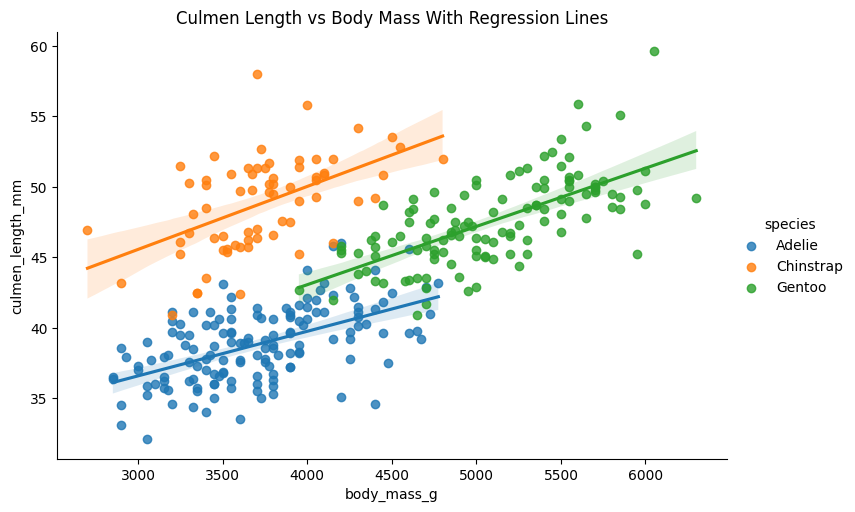

In [21]:
sns.lmplot(
    data=df,
    x="body_mass_g", y="culmen_length_mm",
    hue="species",
    aspect=1.5
)
plt.title("Culmen Length vs Body Mass With Regression Lines")
plt.show()


**Description:**
The regression plot shows the relationship between culmen length and body mass for each species.
Heavier penguins generally have longer culmens, although the strength of the relationship varies by species.
Gentoo penguins cluster toward higher body mass and longer bills, while Adelie and Chinstrap penguins form separate, more compact groups.

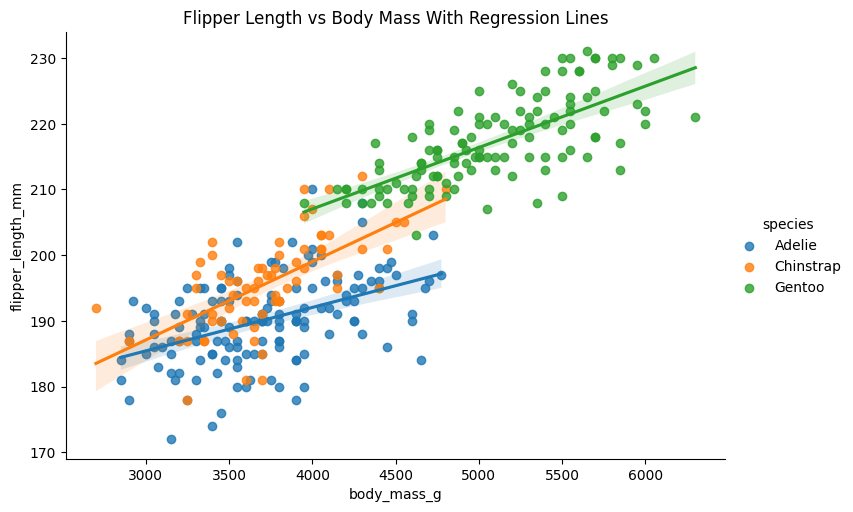

In [15]:
import seaborn as sns

sns.lmplot(
    data=df,
    x="body_mass_g", y="flipper_length_mm",
    hue="species",
    aspect=1.5
)
plt.title("Flipper Length vs Body Mass With Regression Lines")
plt.show()


**Description:**
This plot illustrates the relationship between body mass and flipper length, including regression lines for each species.
There is a strong positive association: heavier penguins tend to have longer flippers.
Gentoo penguins dominate the upper-right portion of the plot due to their large body size, while Adelie and Chinstrap species occupy lower ranges.